# Part I - Ford Bike Trip Data
## by Ajao Abdullah

## Introduction
> The name of the dataset I will be working on is Ford Bike trip data. The dataset I will be working on is a data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# view 5 rows of the dataset
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126778 entries, 0 to 126777
Data columns (total 16 columns):
duration_sec               126778 non-null int64
start_time                 126778 non-null object
end_time                   126778 non-null object
start_station_id           126622 non-null float64
start_station_name         126622 non-null object
start_station_latitude     126778 non-null float64
start_station_longitude    126778 non-null float64
end_station_id             126622 non-null float64
end_station_name           126622 non-null object
end_station_latitude       126778 non-null float64
end_station_longitude      126778 non-null float64
bike_id                    126778 non-null int64
user_type                  126777 non-null object
member_birth_year          121196 non-null float64
member_gender              121196 non-null object
bike_share_for_all_trip    126777 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 15.5+ MB


In [5]:
#  drop unwanted columns
ford_bike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126778 entries, 0 to 126777
Data columns (total 12 columns):
duration_sec               126778 non-null int64
start_time                 126778 non-null object
end_time                   126778 non-null object
start_station_id           126622 non-null float64
start_station_name         126622 non-null object
end_station_id             126622 non-null float64
end_station_name           126622 non-null object
bike_id                    126778 non-null int64
user_type                  126777 non-null object
member_birth_year          121196 non-null float64
member_gender              121196 non-null object
bike_share_for_all_trip    126777 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 11.6+ MB


In [6]:
ford_bike.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,126778.000000,126622.000000,126622.000000,126778.000000,121196.000000
mean,735.933892,138.301662,136.108275,4694.799737,1984.805216
std,1796.783188,112.121818,111.925483,1647.102131,10.159118
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,327.000000,47.000000,44.000000,4385.000000,1980.000000
50%,520.000000,102.000000,99.000000,5106.000000,1987.000000
75%,807.000000,239.000000,235.000000,5905.000000,1992.000000
max,85444.000000,398.000000,398.000000,6645.000000,2001.000000


In [7]:
# check the content in user type column
ford_bike['user_type'].value_counts()

Subscriber    112534
Customer       14243
Name: user_type, dtype: int64

In [8]:
# check the content in user type column
ford_bike['member_gender'].value_counts()

Male      90230
Female    28377
Other      2589
Name: member_gender, dtype: int64

In [9]:
# change the dtype of user type and member gender to category
ford_bike.user_type = ford_bike.user_type.astype('category')

ford_bike.member_gender = ford_bike.member_gender.astype('category')

In [10]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126778 entries, 0 to 126777
Data columns (total 12 columns):
duration_sec               126778 non-null int64
start_time                 126778 non-null object
end_time                   126778 non-null object
start_station_id           126622 non-null float64
start_station_name         126622 non-null object
end_station_id             126622 non-null float64
end_station_name           126622 non-null object
bike_id                    126778 non-null int64
user_type                  126777 non-null category
member_birth_year          121196 non-null float64
member_gender              121196 non-null category
bike_share_for_all_trip    126777 non-null object
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 9.9+ MB


In [11]:
# converting seconds to minutes 
ford_bike['duration_min'] = ford_bike['duration_sec'] / 60
ford_bike.duration_min = ford_bike.duration_min.astype('int64')
ford_bike.duration_min.head()

0     869
1     708
2    1030
3     608
4      26
Name: duration_min, dtype: int64

In [12]:
# changing data type of start_time and end_time to datetime.
ford_bike.start_time = pd.to_datetime(ford_bike.start_time)
ford_bike.end_time = pd.to_datetime(ford_bike.end_time)

In [13]:
# new columns from start_time
ford_bike['start_month'] = ford_bike.start_time.dt.month
ford_bike['start_weekday'] = ford_bike.start_time.dt.weekday 
ford_bike['start_hour'] = ford_bike.start_time.dt.hour

In [14]:
# create a column to calculate the age of each riders
ford_bike['age'] = 2019 - ford_bike['member_birth_year']

## What is the structure of your dataset?

> There are 126778 ford bokes in the dataset with 16 columns. There are two categorical variable we will be looking at: the 
user type and the gender of each member that uses the bike.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the the features that best predict each bike trip. I will be looking at the age, gender and user type of each member.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that duration seconds will have the strongest effect on knowing the time it takes. I also think that the gender and and user type will also play a role in finding the factors that affect the choice of bikes.

## Univariate Exploration

### Average bike trip duration

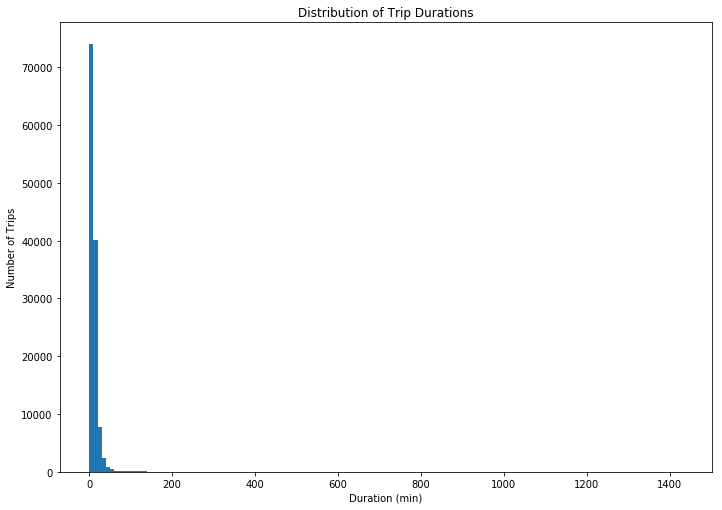

In [15]:
# histogram plot displaying bike trips in minutes
binsize = 10
bins = np.arange(0, ford_bike['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = ford_bike, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.show()

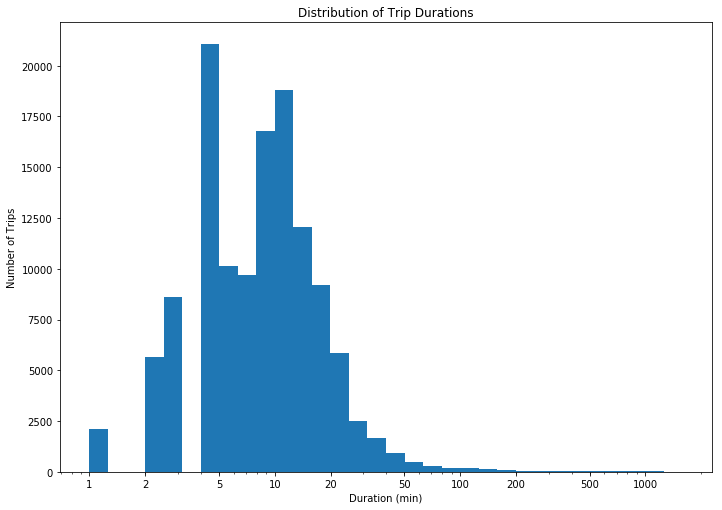

In [16]:
# there's a long tail in the distribution, so let's put it on a log scale instead
# logarthmic scale transformation on a histogram
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(ford_bike['duration_min'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = ford_bike, x = 'duration_min', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

Duration has a long tailed distribution. Duration was plotted on a log-scale, this distribution looks roughly bimodal, with one peak between 4 and 13 minutes. Most of the bike trips lasts for about 4 to 18 minutes. There are not a lot of bike trips that lasted less than 3 minutes and over 40 minutes.

### Daily ride usage

In [17]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

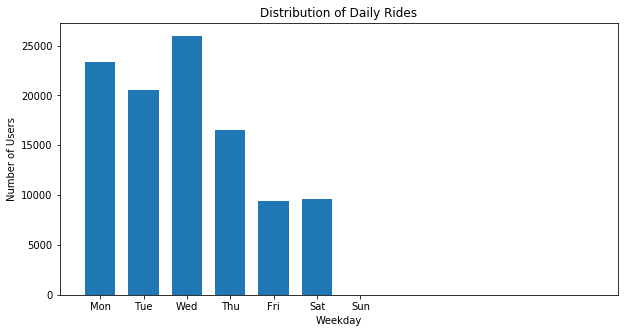

In [18]:
# plot a histogram with gaps between bars
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[10,5])
plt.hist(data = ford_bike, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 7 + 1, 1),weekday_labels)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.show()

Ford Bike service is mostly used on Wednesday with over 25,000 users. The usage decreases on the weekends and no ride on Sunday.

### Users use of ride for the year

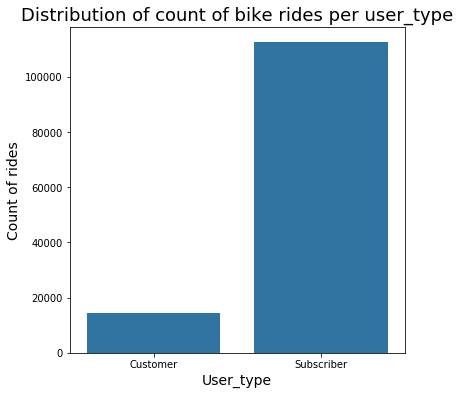

In [19]:
# same distribution in countplot format
plt.figure(figsize=(6,6))
color = sb.color_palette()[0]

sb.countplot(data=ford_bike, x='user_type', color=color)
plt.xlabel('User_type', fontsize=14)
plt.ylabel('Count of rides', fontsize=14)
plt.title('Distribution of count of bike rides per user_type', fontsize=18);

Most of the trips are done by subscribers. 

### Count of Gender in the Trip

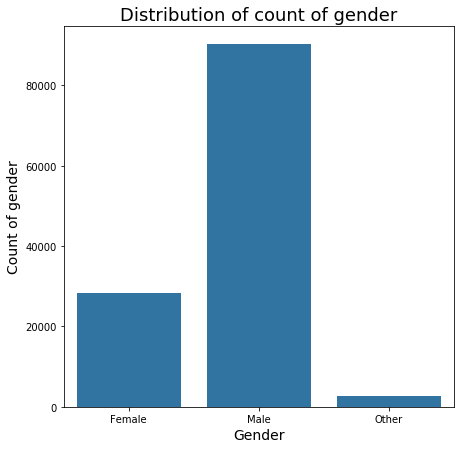

In [20]:
# same distribution in countplot format
plt.figure(figsize=(7,7))

sb.countplot(data=ford_bike, x='member_gender', color=color)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count of gender', fontsize=14)
plt.title('Distribution of count of gender', fontsize=18);

The Male take the bike more than female. Males use the bike service more than females and other genders. Over 80,000 males used the service.

### What is the Age Distribution?

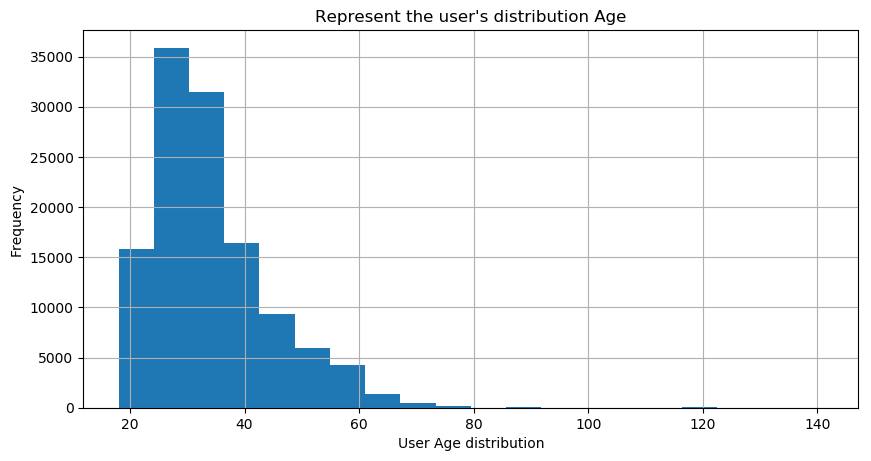

In [21]:
plt.figure(figsize = (10,5), dpi = 100)

ford_bike['age'].hist(bins= 20);

plt.xlabel('User Age distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution Age")

plt.show()

The chart above shows that majority of people that take the bike trip are between 29 and 39years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The bike duration variable took on a large range of values, so I used log to perform a transformation. The data looked bimodal under the log transformation with one peak between 4 and 13 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusal distributuons. Each variable explored showed what you would expect.

## Bivariate Exploration

### What is the correlation between the Trip Duration and Age?

In [22]:
numeric_vars = ['duration_min', 'age']

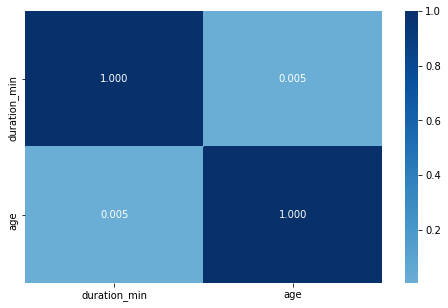

In [23]:
# heatmap to show relationship between variables
plt.figure(figsize = [8, 5])
sb.heatmap(ford_bike[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'Blues', center = 0)
plt.show()

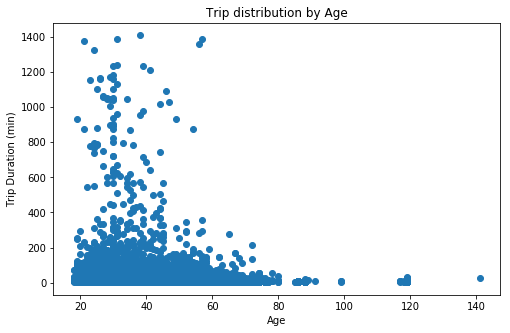

In [24]:
# scatter charts showing distribution between age and trip duration
plt.figure(figsize=[8,5])
plt.scatter(data = ford_bike, x = 'age', y ='duration_min', alpha= None)
plt.title('Trip distribution by Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.show()

The chart shows the concentration of rides are for persons between ages 20 and 55. The colleration also shows a positive relationship between age and the trip duration.

### What is the duration of each Gender?

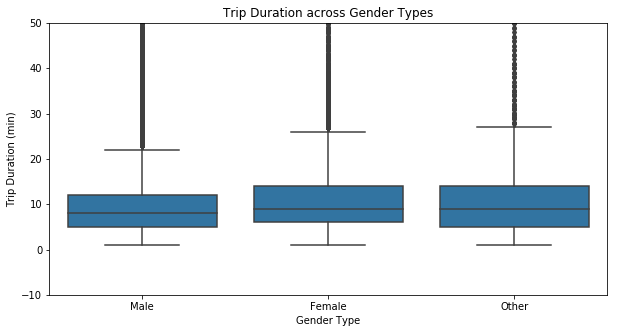

In [43]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
sb.boxplot(data = ford_bike, x='member_gender', y='duration_min', order=['Male', 'Female', 'Other'], color=base_color)
plt.ylim(-10, 50)
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.show()

Limited the duration to have a better view. The boxplot does show that female and other gender have a higher trip duration than males.

### How long is the trip duration of each User in minutes?

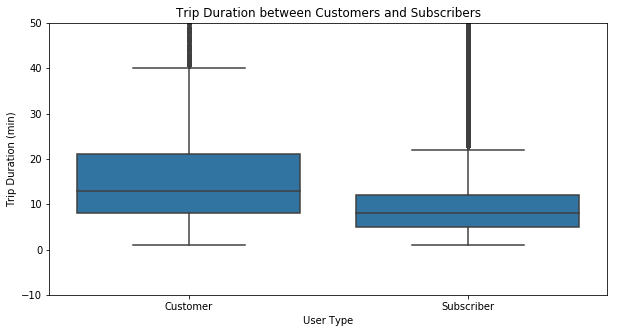

In [44]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = ford_bike, x='user_type', y='duration_min', color=base_color)
plt.ylim(-10, 50)
plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

It can be deduced that Customers have more ride duration than subscribers.

### Distribution of User and their Age

Text(0.5,1,'Distribution of Users and their Age')

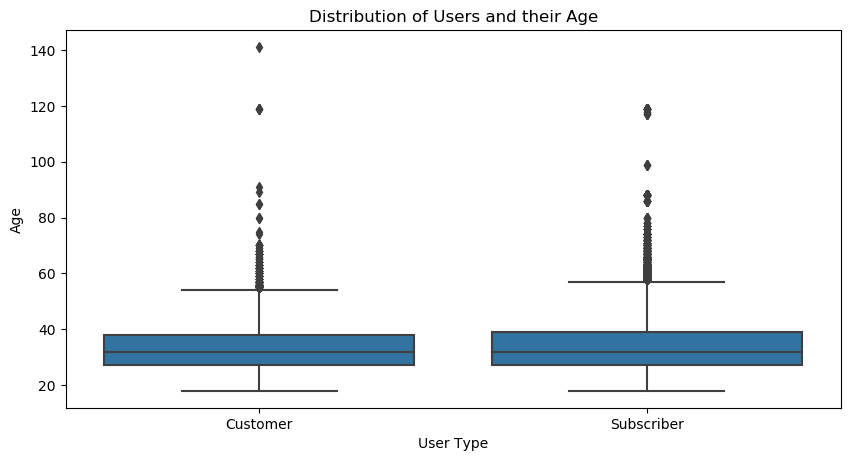

In [29]:
### Distribution depending on their age and user type

plt.figure(figsize = (10,5), dpi = 100)

base_color = sb.color_palette()[0]
sb.boxplot(data=ford_bike,x = 'user_type', y = 'age', color=base_color)

plt.xlabel('User Type')

plt.ylabel('Age')

plt.title('Distribution of Users and their Age')

From the chart, even though it looks like there is a slight difference, subcribers are much younger than the customers. 

### Distribution depending on Age and Member gender

Text(0.5,1,'Distribution depending on their Age and member_gender')

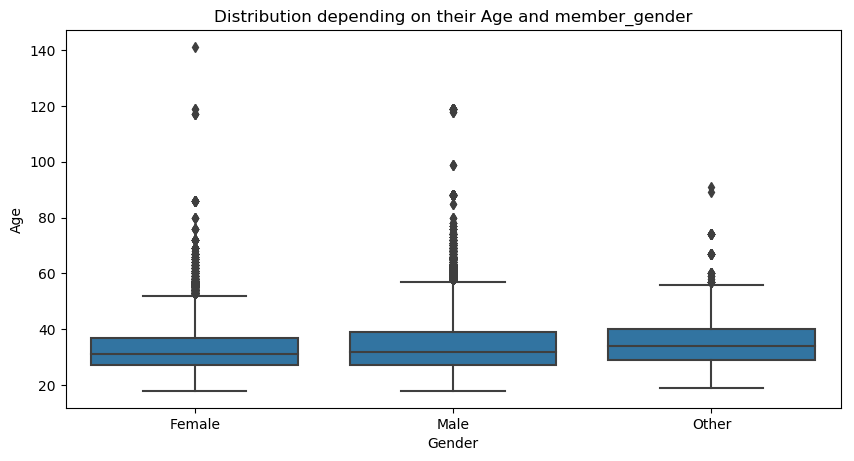

In [30]:
plt.figure(figsize = (10,5), dpi = 100)

base_color = sb.color_palette()[0]

sb.boxplot(data=ford_bike,x = "member_gender", y = "age", color=base_color)


plt.xlabel('Gender')

plt.ylabel('Age')


plt.title('Distribution depending on their Age and member_gender')

Females have the lowest age group than the Males that take the ford bike ride. Others have the highest Age group that took the ride.

### Distribution depending on Bike Share and Age

Text(0.5,1,'Distribution of Bike Share and member Age')

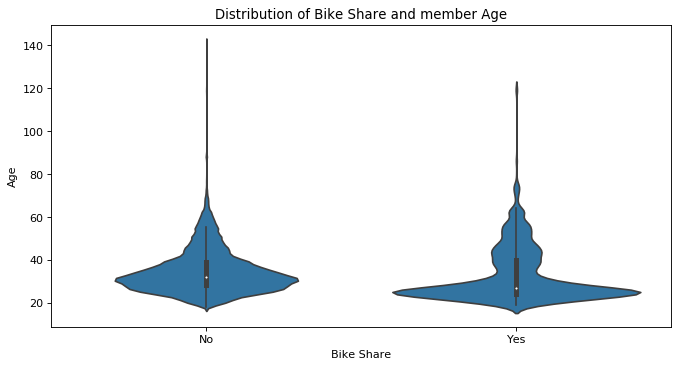

In [31]:
plt.figure(figsize = (10,5), dpi = 80)

base_color = sb.color_palette()[0]

sb.violinplot(data=ford_bike,x = 'bike_share_for_all_trip', y = 'age', color=base_color)


plt.xlabel('Bike Share')

plt.ylabel('Age')


plt.title('Distribution of Bike Share and member Age')

Text(0.5,1,'Distribution of Bike Share and member Age')

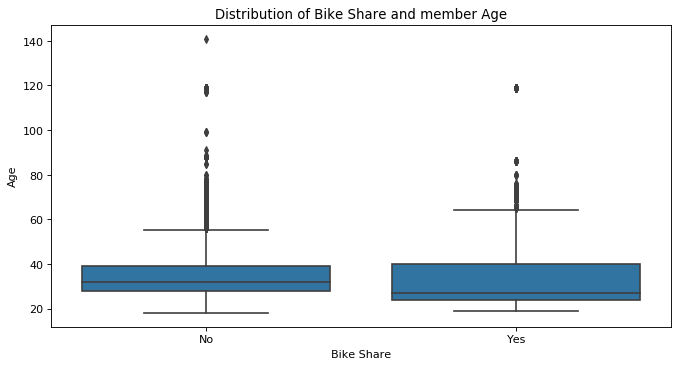

In [32]:
plt.figure(figsize = (10,5), dpi = 80)

base_color = sb.color_palette()[0]

sb.boxplot(data=ford_bike,x = 'bike_share_for_all_trip', y = 'age', color=base_color)


plt.xlabel('Bike Share')

plt.ylabel('Age')


plt.title('Distribution of Bike Share and member Age')

Here we first used the violin plot and later used the box plot to verify the distribution of bike share and their age. In both cases, it can be seen that the younger age group didnt share their ride but the higher age group shared their ride.

### Distinction Between Age, Member gender and Bike share 

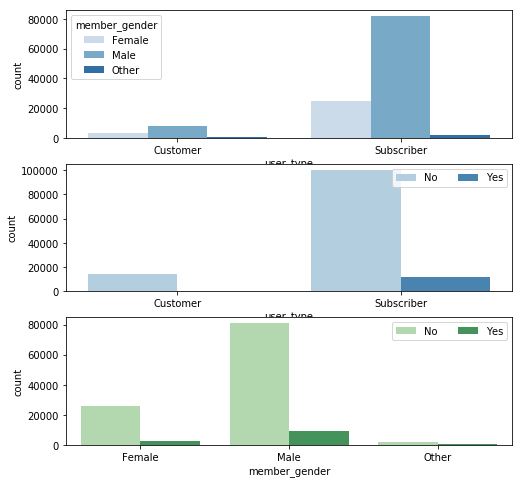

In [33]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: user type vs member gender
plt.subplot(3, 1, 1)
sb.countplot(data = ford_bike, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: user type vs. bike share 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = ford_bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member gender vs. bike share use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = ford_bike, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

We can deduce from the chart below that bike sharing is only available to subscribers and customer type doesn’t really affect the number of trips in any week day. Male are the Majority subcribers while males have more customers. But there are more subcribers than customers. Males share their trip more than the females and other gender.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased with an increase in age not surprisingly.
The user type Customers go on a longer trip than the user type Subscribers where the User Customer are more than Subscriber

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.
I also found that among users, an actual customer is spending more time on a bike trip than subscribers. 

## Multivariate Exploration

### Trip Duration for each Gender as regards Age

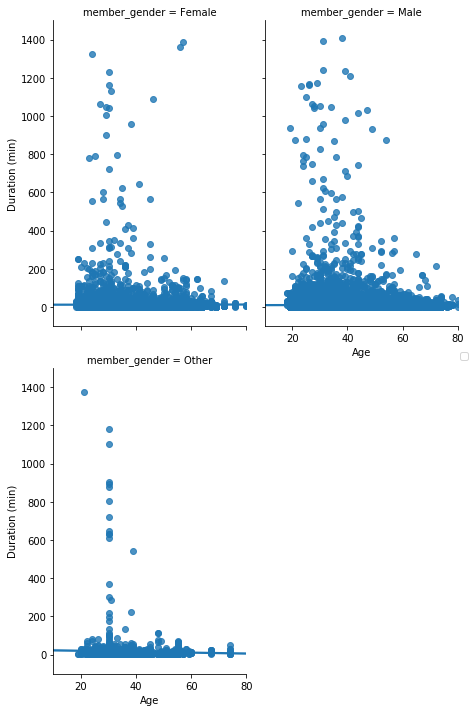

In [34]:
plt.figure(figsize=[15,10])
g = sb.FacetGrid(data = ford_bike, col = 'member_gender', col_wrap = 2, size = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sb.regplot, 'age', 'duration_min')
g.set_axis_labels('Age', 'Duration (min)')
g.add_legend()
plt.show()

Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group that does most of the rides. Females and males do appear to have similar ride average.

### Trip Duration on a weekday for each Gender

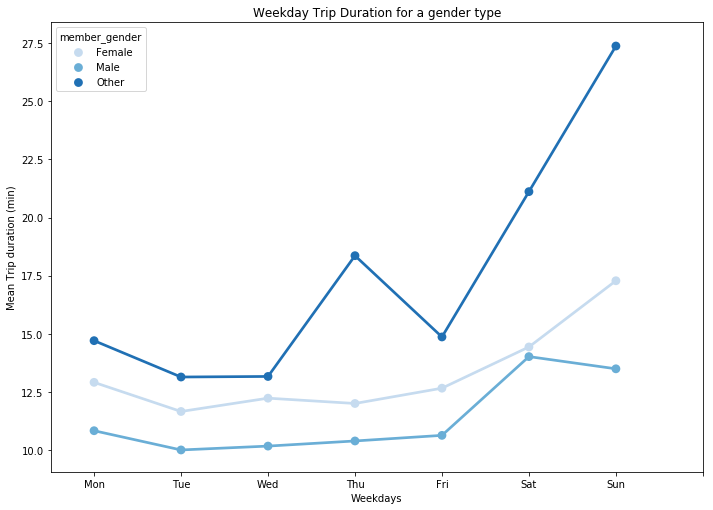

In [35]:
plt.figure(figsize=[11.69, 8.27])
sb.pointplot(data = ford_bike, x = 'start_weekday', y = 'duration_min', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Weekday Trip Duration for a gender type')
plt.ylabel('Mean Trip duration (min)')
plt.xlabel('Weekdays')
plt.xticks(np.arange(0, 7 + 1, 1),weekday_labels)
plt.show()

From the graph, the trip duration start trending up from Wednesdays to Saturdays. Males still have the shortest bike trip.

### Distribution of Bike Trips per hour of the week and day of the week of each user type

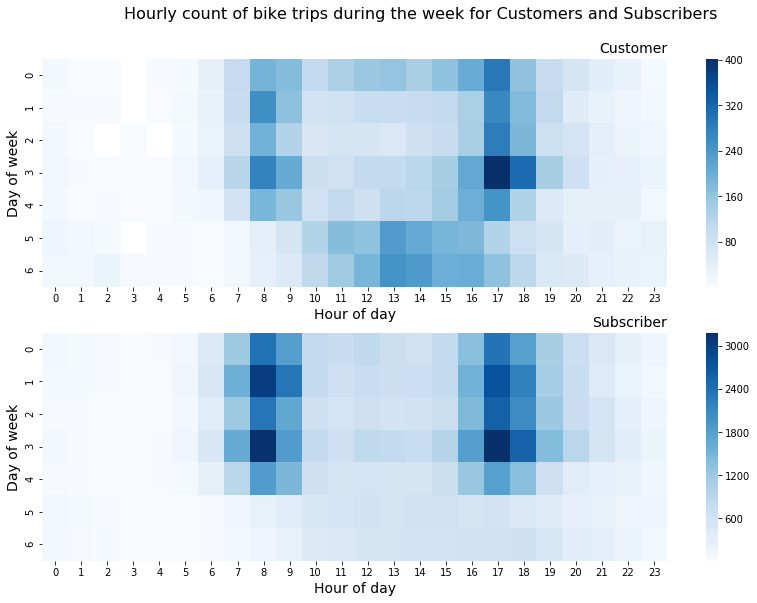

In [37]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = ford_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = ford_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_weekday', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_weekday', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly count of bike trips during the week for Customers and Subscribers', fontsize=16);


For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week. It is interesting, that Customers tend to use the bike service mostly on Thursday from 5 PM to 6 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM and 5-6 PM). There are more subscribers on Tuesdays and Thursdays.

### Correlation between each variable in a dataset

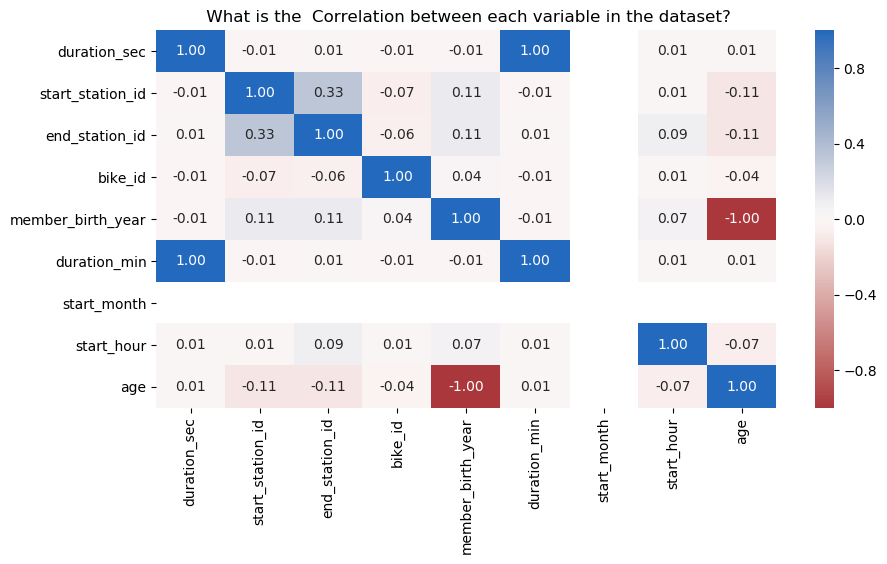

In [39]:
plt.figure(figsize = (10,5), dpi = 100)



sb.heatmap(ford_bike.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

plt.title(" What is the  Correlation between each variable in the dataset?")


plt.xticks(rotation = 90)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()

There is no correlation for any variable with time ( duration sec /minutes/hours)
There is a negative correlation between member birth year with age.
There is a positive correlation between start station id and end_station id. There are some correlation between some of the variables like the start station id and member birth year. 

### Correlation between specific numeric variable in a dataset

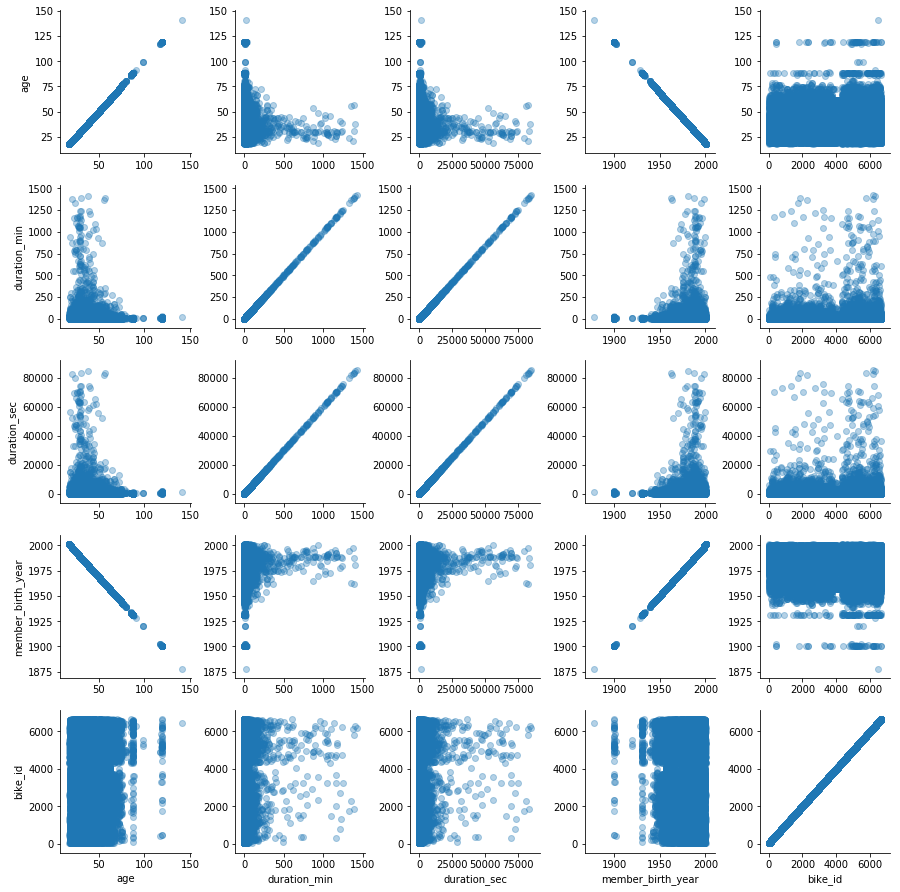

In [40]:
data_stat = ['age', 'duration_min',"duration_sec", "member_birth_year", "bike_id"]
g = sb.PairGrid(data = ford_bike, vars = data_stat ) ;
g.map(plt.scatter, alpha = 1/3);

There is no Correlation for any variable with time ( duration sec /minutes)
There is a negative  Correlation between member birth year and age which normal.
There is no significant Correlation for any variable with bike_id

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The hour of the day and the day of the week became clearer in this findings. Most subcribers do have most of their ride during the week than weekend. While for the customers, Most of their rides are during the weekday and a few ride during the weekend.

### Were there any interesting or surprising interactions between features?

> Most of the variables are not correlated. and we just have a negative correlation between the member birth year and age.

## Conclusions
> According to the analysis, I found subscribers tend to rent more bikes. One possible way to increase revenue is to attract more potential customers and convert more exiting customers to subscribers. More of the bike riders are Males. We could make encourage females about what they have to gain in bike rides. 
